# Table of Contents
 <p><div class="lev1"><a href="#Our-plan"><span class="toc-item-num">1&nbsp;&nbsp;</span>Our plan</a></div><div class="lev1"><a href="#Data-wrangling"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data wrangling</a></div><div class="lev1"><a href="#Data-quality-assessment-and-profiling"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data quality assessment and profiling</a></div><div class="lev2"><a href="#Overview"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Overview</a></div><div class="lev3"><a href="#Basic-things-to-do"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Basic things to do</a></div><div class="lev3"><a href="#Main-questions"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Main questions</a></div><div class="lev3"><a href="#Helpful-packages"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Helpful packages</a></div><div class="lev3"><a href="#Example-backlog"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Example backlog</a></div><div class="lev2"><a href="#Missing-data"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Missing data</a></div><div class="lev3"><a href="#By-variable"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>By variable</a></div><div class="lev4"><a href="#Deep-dive:-exploitable-variables"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Deep dive: <em>exploitable</em> variables</a></div><div class="lev4"><a href="#Deep-dive:-National-rainfall-index"><span class="toc-item-num">3.2.1.2&nbsp;&nbsp;</span>Deep dive: National rainfall index</a></div><div class="lev3"><a href="#By-country"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>By country</a></div><div class="lev3"><a href="#By-country-for-a-single-variable"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>By country for a single variable</a></div><div class="lev3"><a href="#Over-time"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Over time</a></div><div class="lev2"><a href="#Profiling"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Profiling</a></div><div class="lev3"><a href="#pivottablejs"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span><code>pivottablejs</code></a></div><div class="lev3"><a href="#pandas_profiling"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span><code>pandas_profiling</code></a></div><div class="lev3"><a href="#To-do:-Write-down-observations-from-profiling"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>To do: Write down observations from profiling</a></div><div class="lev1"><a href="#To-do:-Collect-list-of-questions-you-have-coming-out-of-quality-assessment-and-profiling"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>To do</strong>: Collect list of questions you have coming out of quality assessment and profiling</a></div>

Packages needed for this notebook:
- pip install folium

In [1]:
# must go first 
%matplotlib inline 
%config InlineBackend.figure_format='retina'

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale=1.3)
import folium

# system packages 
import os, sys
import warnings
warnings.filterwarnings('ignore')

# basic wrangling 
import numpy as np
import pandas as pd

# eda tools 
import missingno as msno
import pandas_profiling

# File with functions from prior notebook(s)
from aqua_helper import time_slice, country_slice, time_series, simple_regions, subregion, variable_slice

# Update matplotlib defaults to something nicer 
mpl_update = {'font.size':16,
              'xtick.labelsize':14,
              'ytick.labelsize':14,
              'figure.figsize':[12.0,8.0],
              'axes.color_cycle':['#0055A7', '#2C3E4F', '#26C5ED', '#00cc66', '#D34100', '#FF9700','#091D32'], 
              'axes.labelsize':20,
              'axes.labelcolor':'#677385',
              'axes.titlesize':20,
              'lines.color':'#0055A7',
              'lines.linewidth':3,
              'text.color':'#677385'}
mpl.rcParams.update(mpl_update)

# Our plan

<img src="figures/branches.jpg" alt="Crisp-DM" width="390" align="right">
Exploratory data analysis consists of the following major tasks, which we present linearly here because each task doesn't make much sense to do without the ones prior to it. However, in reality, you are going to constantly jump around from step to step.  You may want to do all the steps for a subset of the variables first. Or often, an observation will bring up a question you want to investigate and you'll branch off and explore to answer that question before returning down the main path of exhaustive EDA.

1. Research the fields of the dataset 
2. Form hypotheses/develop investigation themes to explore 
3. Wrangle data 
3. **Assess quality of data** 
4. **Profile data** 
5. Explore each individual variable in the dataset 
6. Assess the relationship between each variable and the target 
7. Assess interactions between variables 
8. Explore data across many dimensions 


Throughout the entire analysis you want to:
* Capture a list of hypotheses and questions that come up for further exploration.
* Record things to watch out for/ be aware of in future analyses. 
* Show intermediate results to colleagues to get a fresh perspective, feedback, domain knowledge. Don't do EDA in a bubble! Get feedback throughout especially from people removed from the problem and/or with relevant domain knowledge. 
* Position visuals and results together. EDA relies on your natural pattern recognition abilities so maximize what you'll find by putting visualizations and results in close proximity. 


Write questions that results raise as you go. 
Keep updating list of hypotheses 

# Data wrangling 

http://www.fao.org/nr/water/aquastat/data/query/index.html

In [2]:
data = pd.read_csv('aquastat.csv.gzip', compression='gzip')

In [3]:
data[['variable','variable_full']].drop_duplicates()

variable  \
0                                     total_area   
576                                  arable_land   
1152                         permanent_crop_area   
1728                             cultivated_area   
2304                          percent_cultivated   
2880                                   total_pop   
3456                                   rural_pop   
4032                                   urban_pop   
4608                                         gdp   
5184                              gdp_per_capita   
5760                                  agg_to_gdp   
6336                             human_dev_index   
6912                        gender_inequal_index   
7488                      percent_undernourished   
8064                       number_undernourished   
8640                       avg_annual_rain_depth   
9216                         avg_annual_rain_vol   
9792                     national_rainfall_index   
10368                     surface_water_produced   
10944                       groundwater_produced   
11520                surface_groundwater_overlap   
12096                                       irwr   
12672                            irwr_per_capita   
13248                           surface_entering   
13824            surface_inflow_submit_no_treaty   
14400               surface_inflow_submit_treaty   
14976               surface_inflow_secure_treaty   
15552                   total_flow_border_rivers   
16128               accounted_flow_border_rivers   
16704                             accounted_flow   
17280                 surface_to_other_countries   
17856           surface_outflow_submit_no_treaty   
18432              surface_outflow_submit_treaty   
19008              surface_outflow_secure_treaty   
19584           surface_total_external_renewable   
20160                       groundwater_entering   
20736               groundwater_accounted_inflow   
21312             groundwater_to_other_countries   
21888              groundwater_accounted_outflow   
22464             water_total_external_renewable   
23040                    total_renewable_surface   
23616                total_renewable_groundwater   
24192                overlap_surface_groundwater   
24768                            total_renewable   
25344                           dependency_ratio   
25920                 total_renewable_per_capita   
26496      exploitable_regular_renewable_surface   
27072    exploitable_irregular_renewable_surface   
27648        exploitable_total_renewable_surface   
28224  exploitable_regular_renewable_groundwater   
28800                          exploitable_total   
29376                    interannual_variability   
29952                       seasonal_variability   
30528                         total_dam_capacity   
31104                    dam_capacity_per_capita   
31680                       irrigation_potential   
32256                            flood_occurence   
32832                  total_pop_access_drinking   
33408                  rural_pop_access_drinking   
33984                  urban_pop_access_drinking   

                                           variable_full  
0                    Total area of the country (1000 ha)  
576                           Arable land area (1000 ha)  
1152                      Permanent crops area (1000 ha)  
1728   Cultivated area (arable land + permanent crops...  
2304              % of total country area cultivated (%)  
2880                       Total population (1000 inhab)  
3456                       Rural population (1000 inhab)  
4032                       Urban population (1000 inhab)  
4608          Gross Domestic Product (GDP) (current US$)  
5184                  GDP per capita (current US$/inhab)  
5760                 Agriculture, value added to GDP (%)  
6336     Human Development Index (HDI) [highest = 1] (-)  
6912   Gender Inequality Index (GII) [equality = 0; i...  
7488   Prevalence of undernourishment (3-

Simplify regions

In [4]:
data.region = data.region.apply(lambda x: simple_regions[x])

# Data quality assessment and profiling 
Before trying to understand what information is in the data, make sure you understand what the data represents and what's missing. 

## Overview 
###  Basic things to do 
* Categorical: count, count distinct, assess unique values 
* Numerical: count, min, max
* Spot-check random samples and samples that you are familiar with 
* Slice and dice 

### Main questions
* What data isn't there? 
* Is the data that is there right? 
* Is the data being generated the way you think? 

### Helpful packages
* [`missingno`](https://github.com/ResidentMario/missingno)
* [`pandas_profiling`](https://github.com/JosPolfliet/pandas-profiling)

### Example backlog
* Assess the prevalence of missing data across all data fields, assess whether its missing is random or systematic, and identify patterns when such data is missing
* Identify any default values that imply missing data for a given field
* Determine sampling strategy for quality assessment and initial EDA
* For datetime data types, ensure consistent formatting and granularity of data, and perform sanity checks on all dates present in the data.
* In cases where multiple fields capture the same or similar information, understand the relationships between them and assess the most effective field to use
* Assess data type of each field
* For discrete value types, ensure data formats are consistent
* For discrete value types, assess number of distinct values and percent unique and do sanity check on types of answers
* For continuous data types, assess descriptive statistics and perform sanity check on values 
* Understand relationships between timestamps and assess which to use in analysis
* Slice data by device type, operating system, software version and ensure consistency in data across slices
* For device or app data, identify version release dates and assess data for any changes in format or value around those dates


## Missing data

*What data isn’t there?*

Questions to be considering
* Are there systematic reasons for missing data? 
* Are there fields that are always missing at the same time ? 
* Is there information in what data is missing?

Package that provides a number of functions for visualizing what data is missing within a dataset: [`missingno`](https://github.com/ResidentMario/missingno)

### By variable

In [5]:
recent = time_slice(data, '2013-2017')

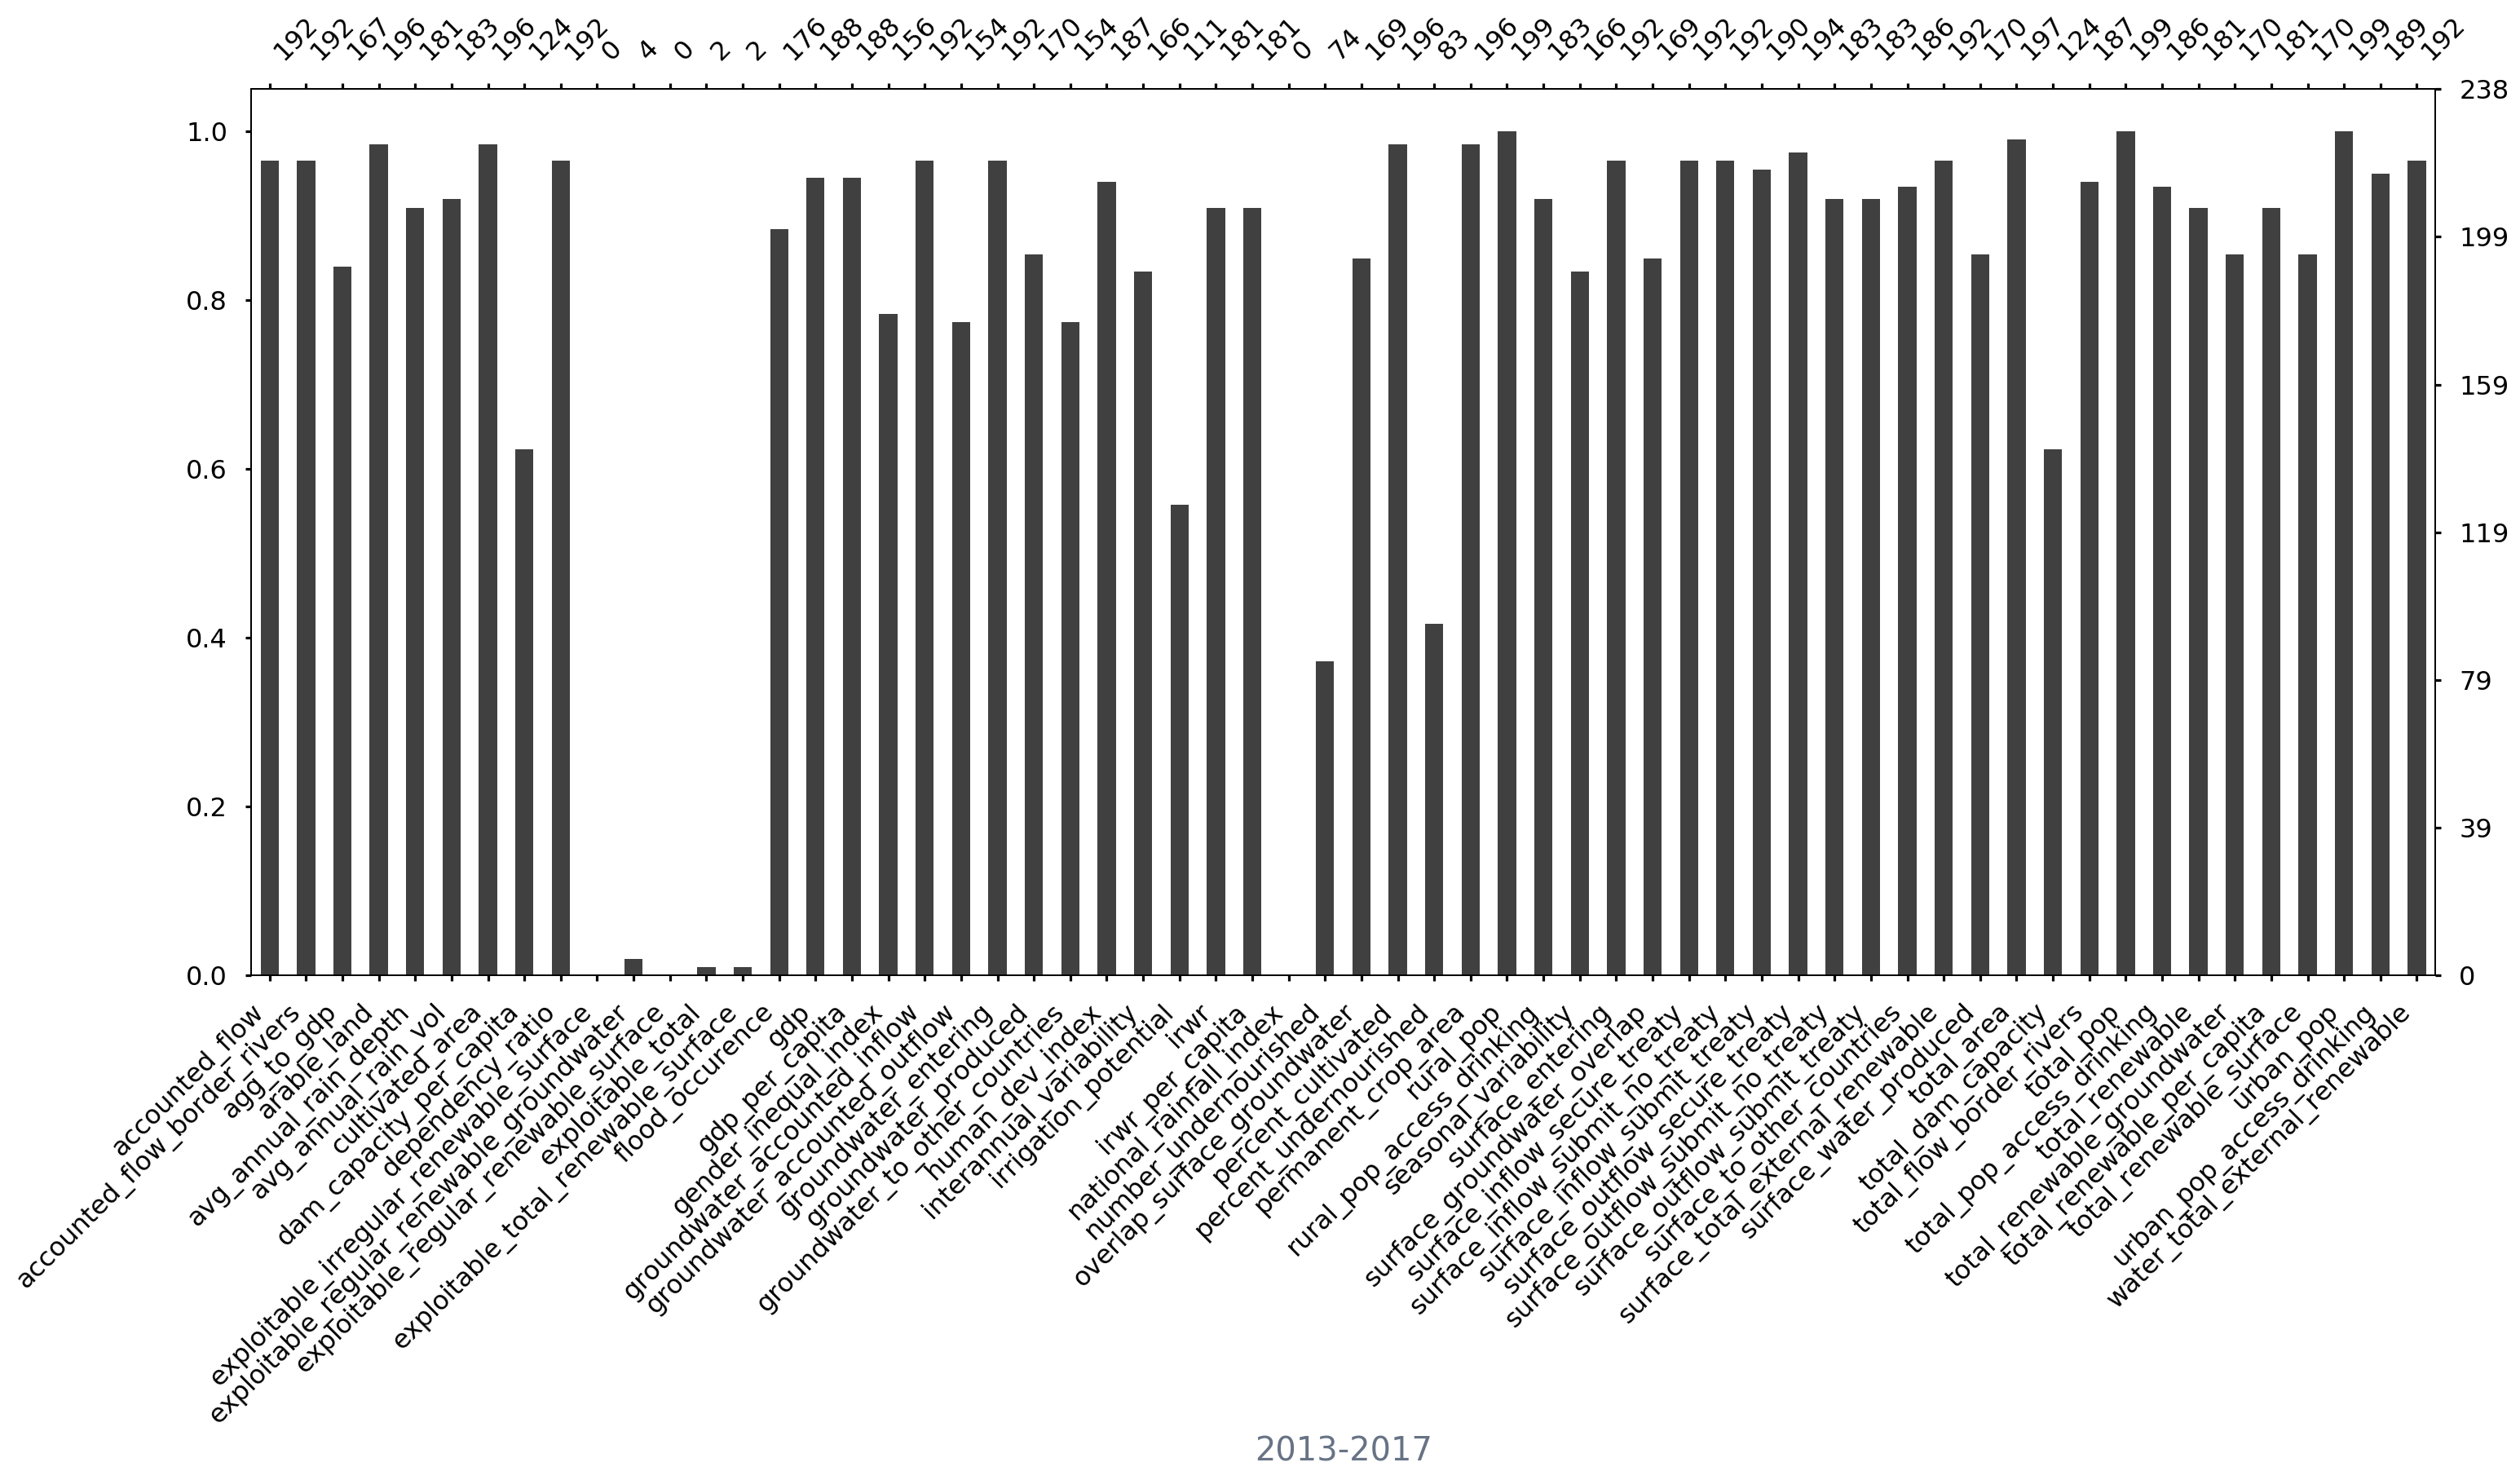

In [6]:
msno.bar(recent, labels=True)

**Discussion**: What questions does this figure bring up? 

Add these to your list of questions! 

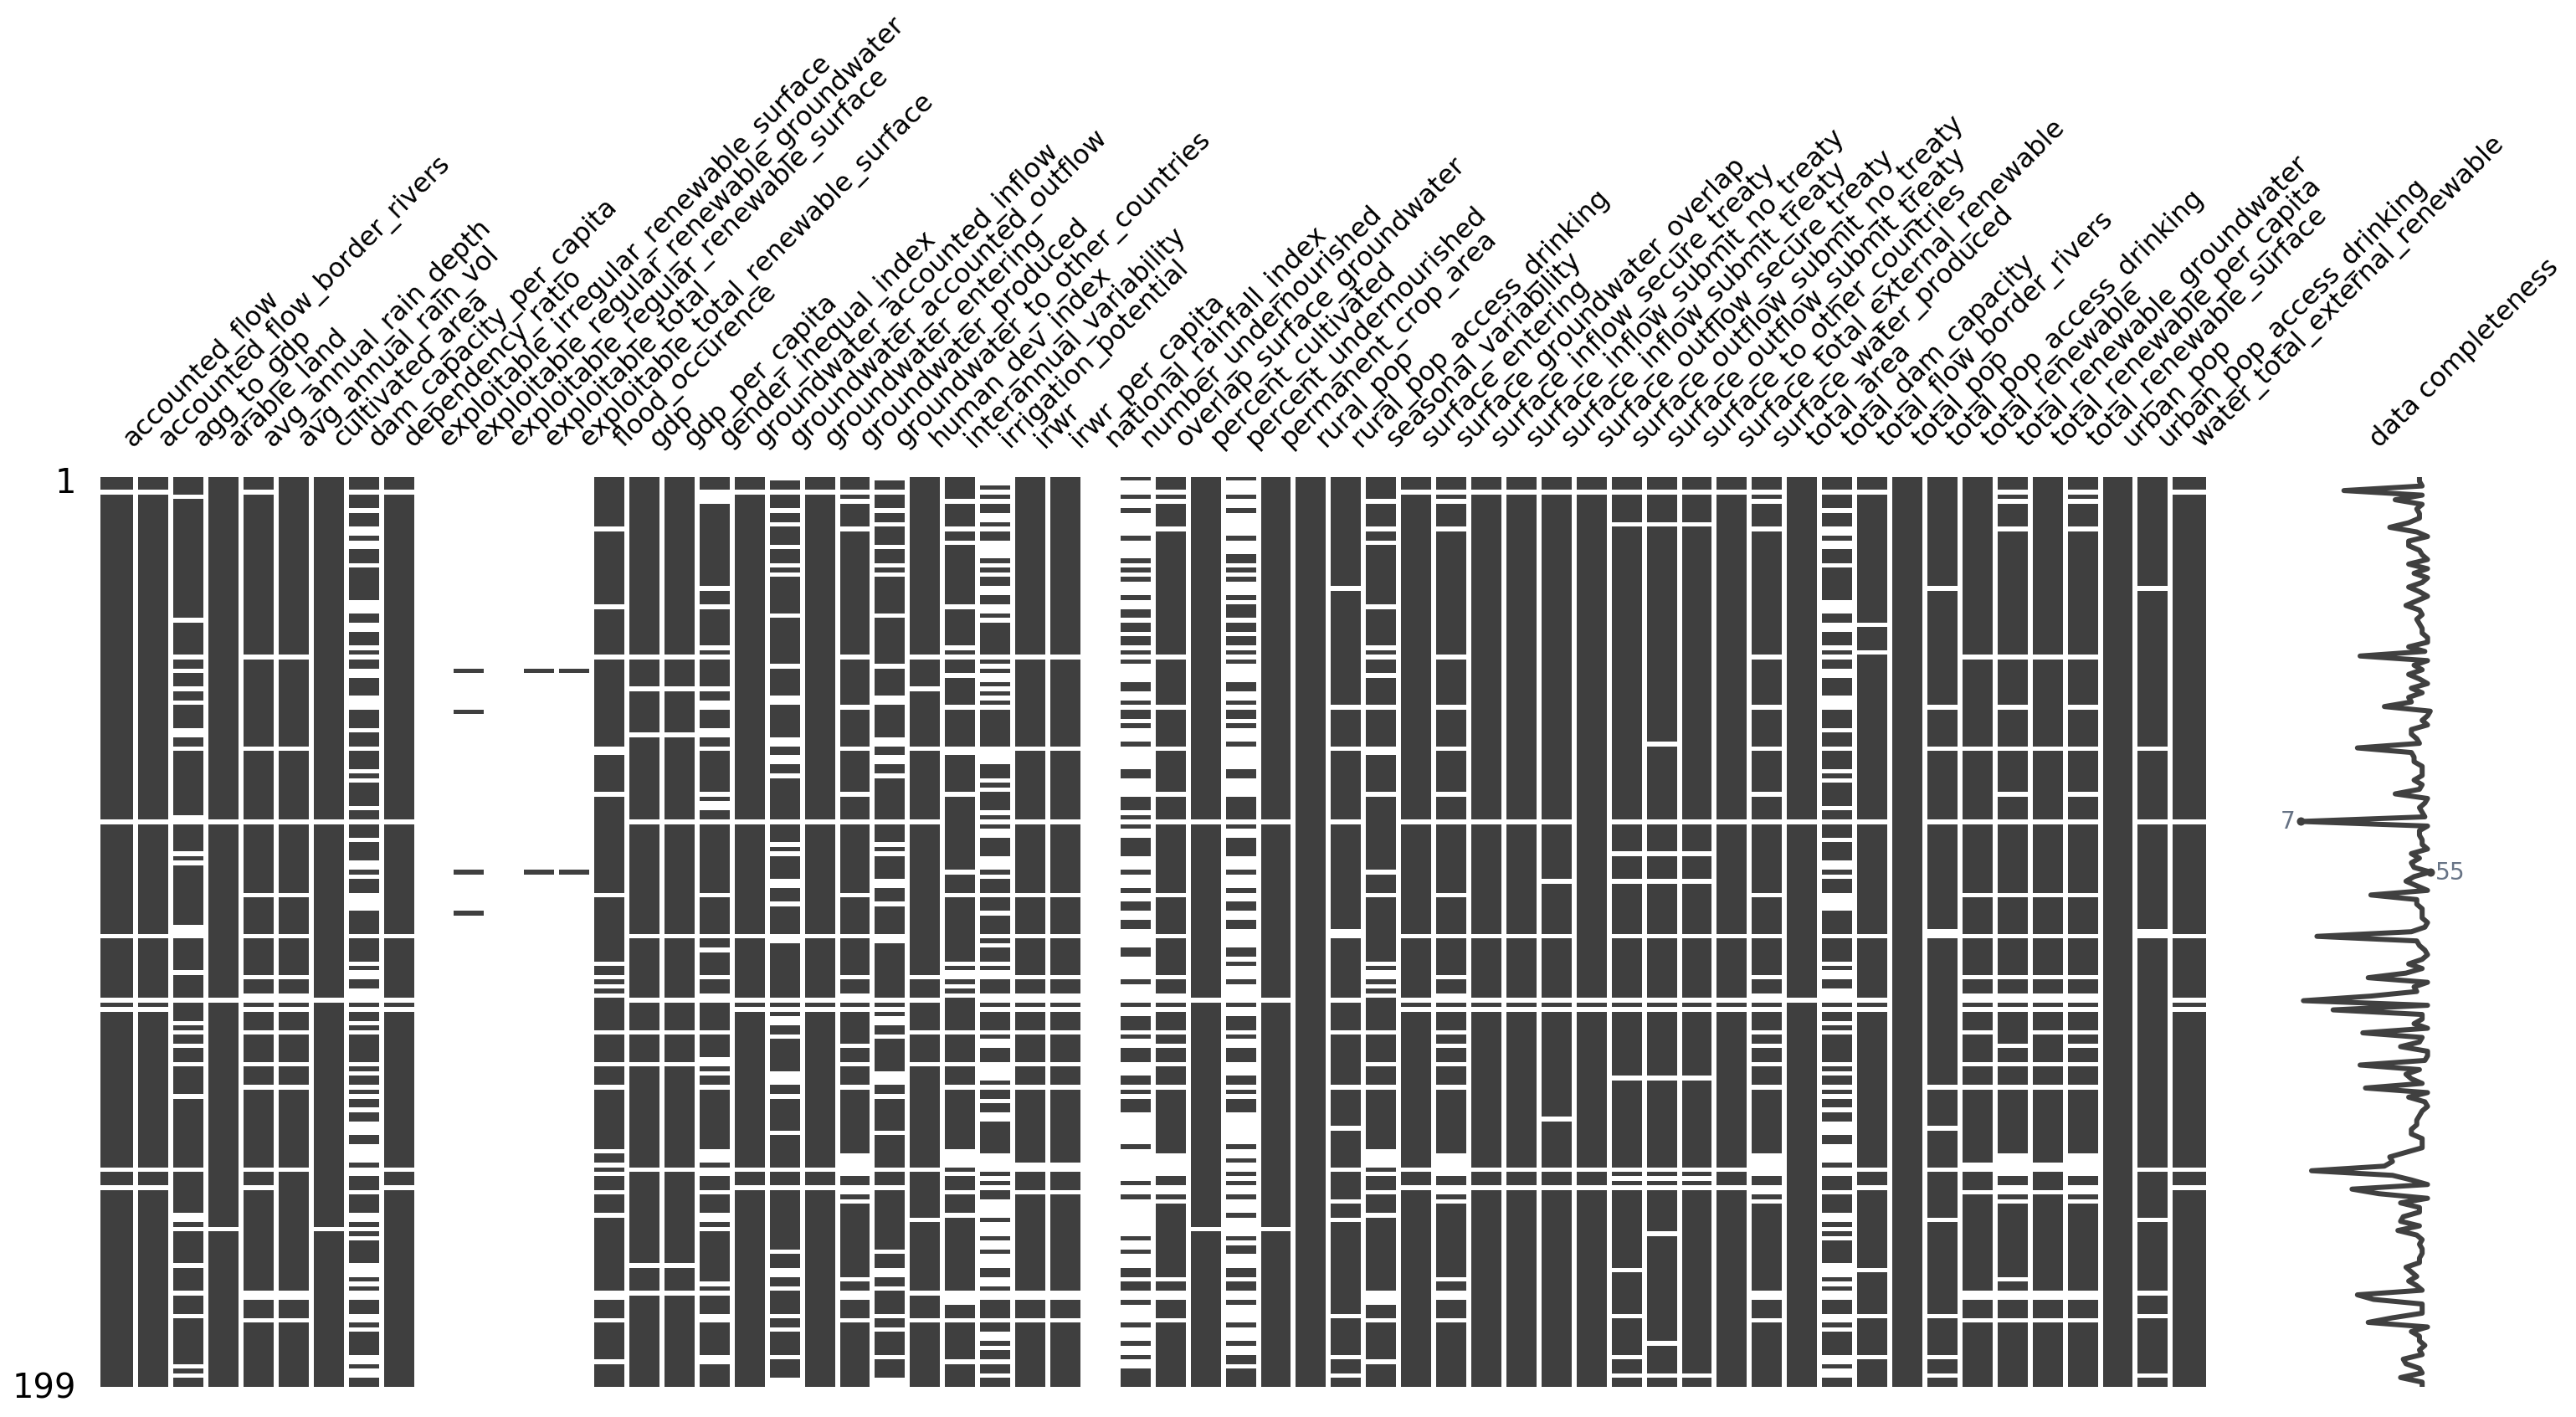

In [7]:
msno.matrix(recent, labels=True)

**Discussion:** What additional information does this provide or what additional questions does it suggest? 

#### Deep dive: *exploitable* variables 

"Exploitable" variables are missing for most countries. 

Question to consider: Does this happen in each time period? 

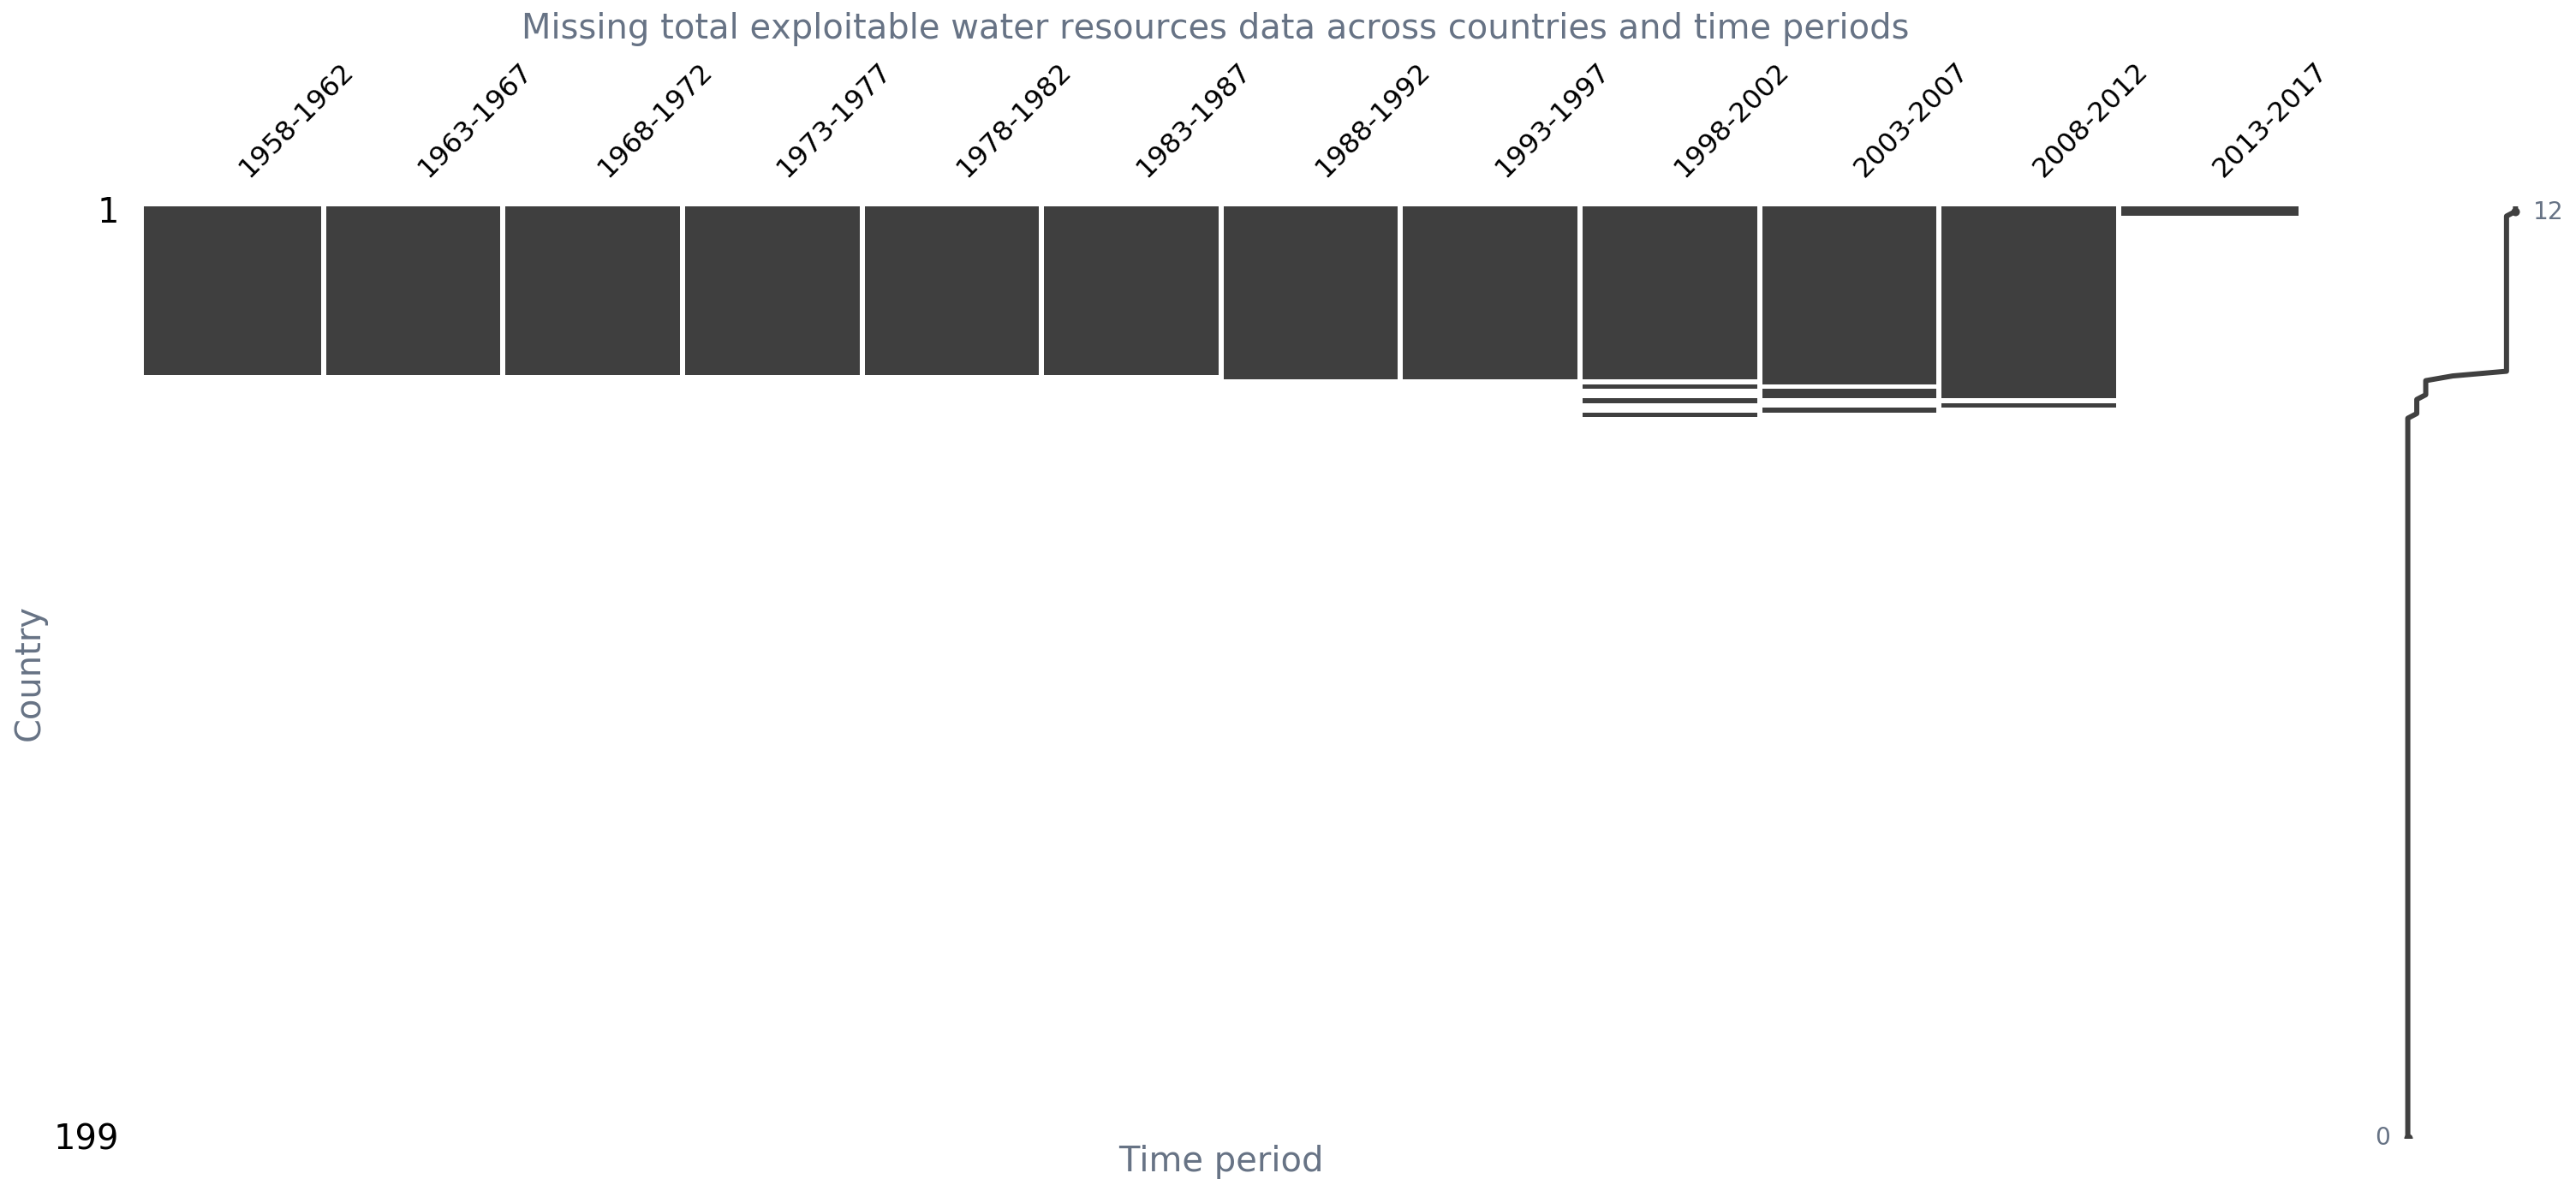

In [8]:
msno.matrix(variable_slice(data, 'exploitable_total'), inline=False, sort='descending');
plt.xlabel('Time period');
plt.ylabel('Country');
plt.title('Missing total exploitable water resources data across countries and time periods \n \n \n \n');

Total exploitable water resources is only reported on for a fraction of the countries and only a very small fraction of those countries have data for the most recent time period. Either a) data has not been reported *yet* and it will be at some point or b) most countries have stopped reporting on this factor or c) we do not have the domain knowledge to understand what's happening.  

We are going to remove exploitable variables for future analysis because such few data points can cause a lot of problems. 

In [9]:
data = data.loc[~data.variable.str.contains('exploitable'),:]

#### Deep dive: National rainfall index 

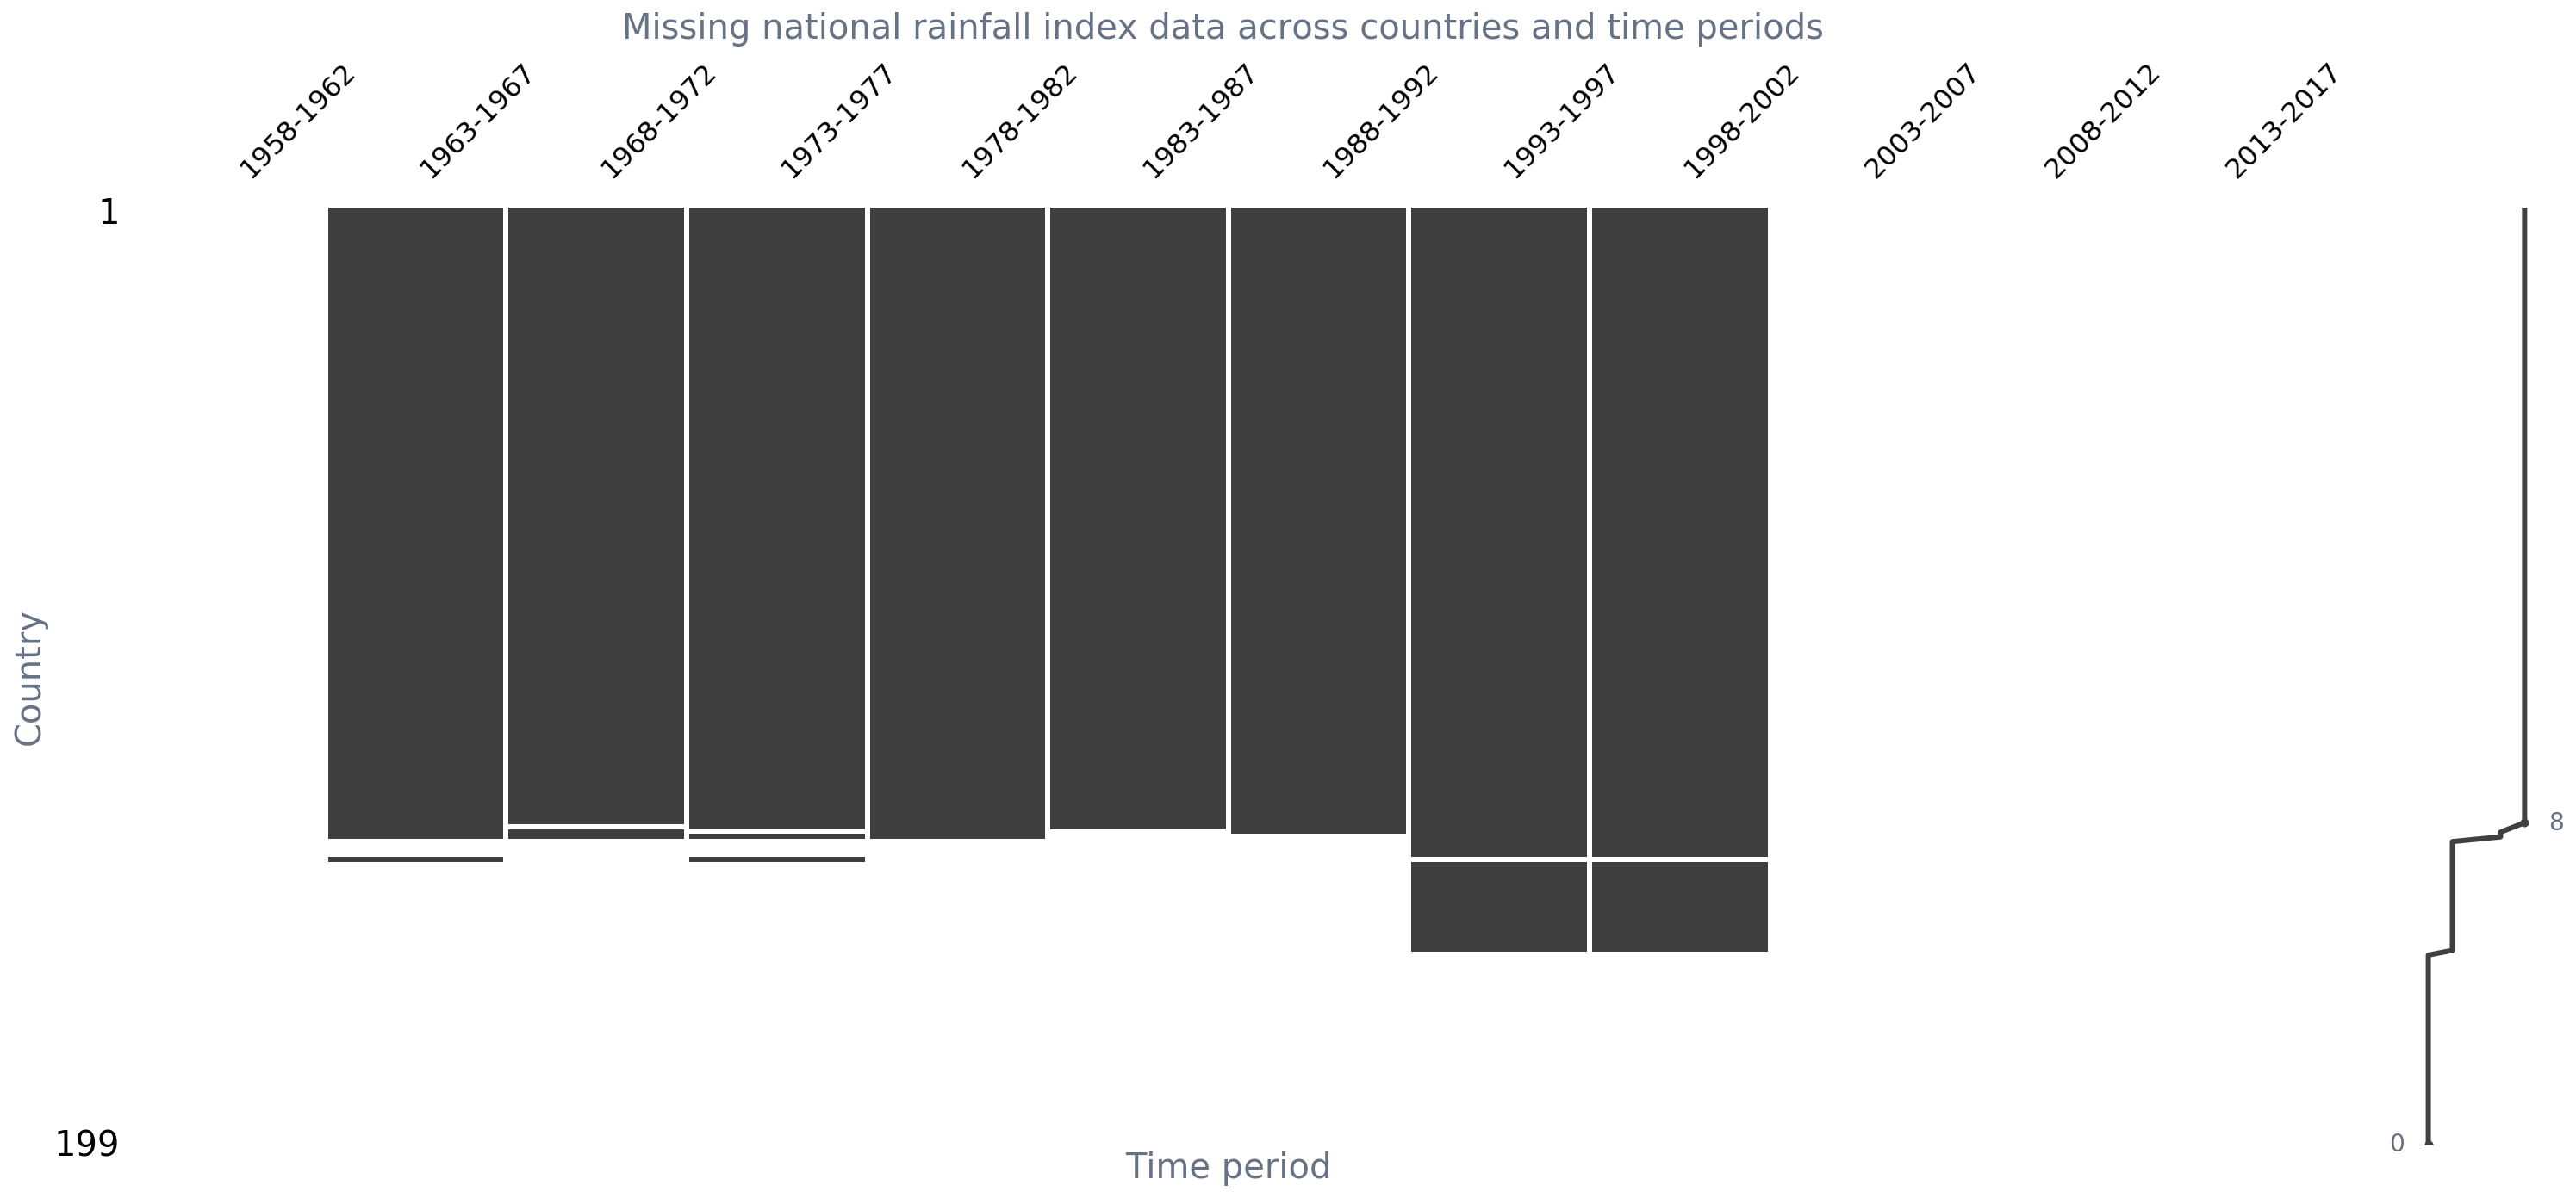

In [10]:
msno.matrix(variable_slice(data, 'national_rainfall_index'), 
            inline=False, sort='descending');
plt.xlabel('Time period');
plt.ylabel('Country');
plt.title('Missing national rainfall index data across countries and time periods \n \n \n \n');

National rainfall index is no longer reported on after 2002. 

In [11]:
data = data.loc[~(data.variable=='national_rainfall_index')]

### By country

Let's look at North America only.

In [12]:
north_america = subregion(data, 'North America')

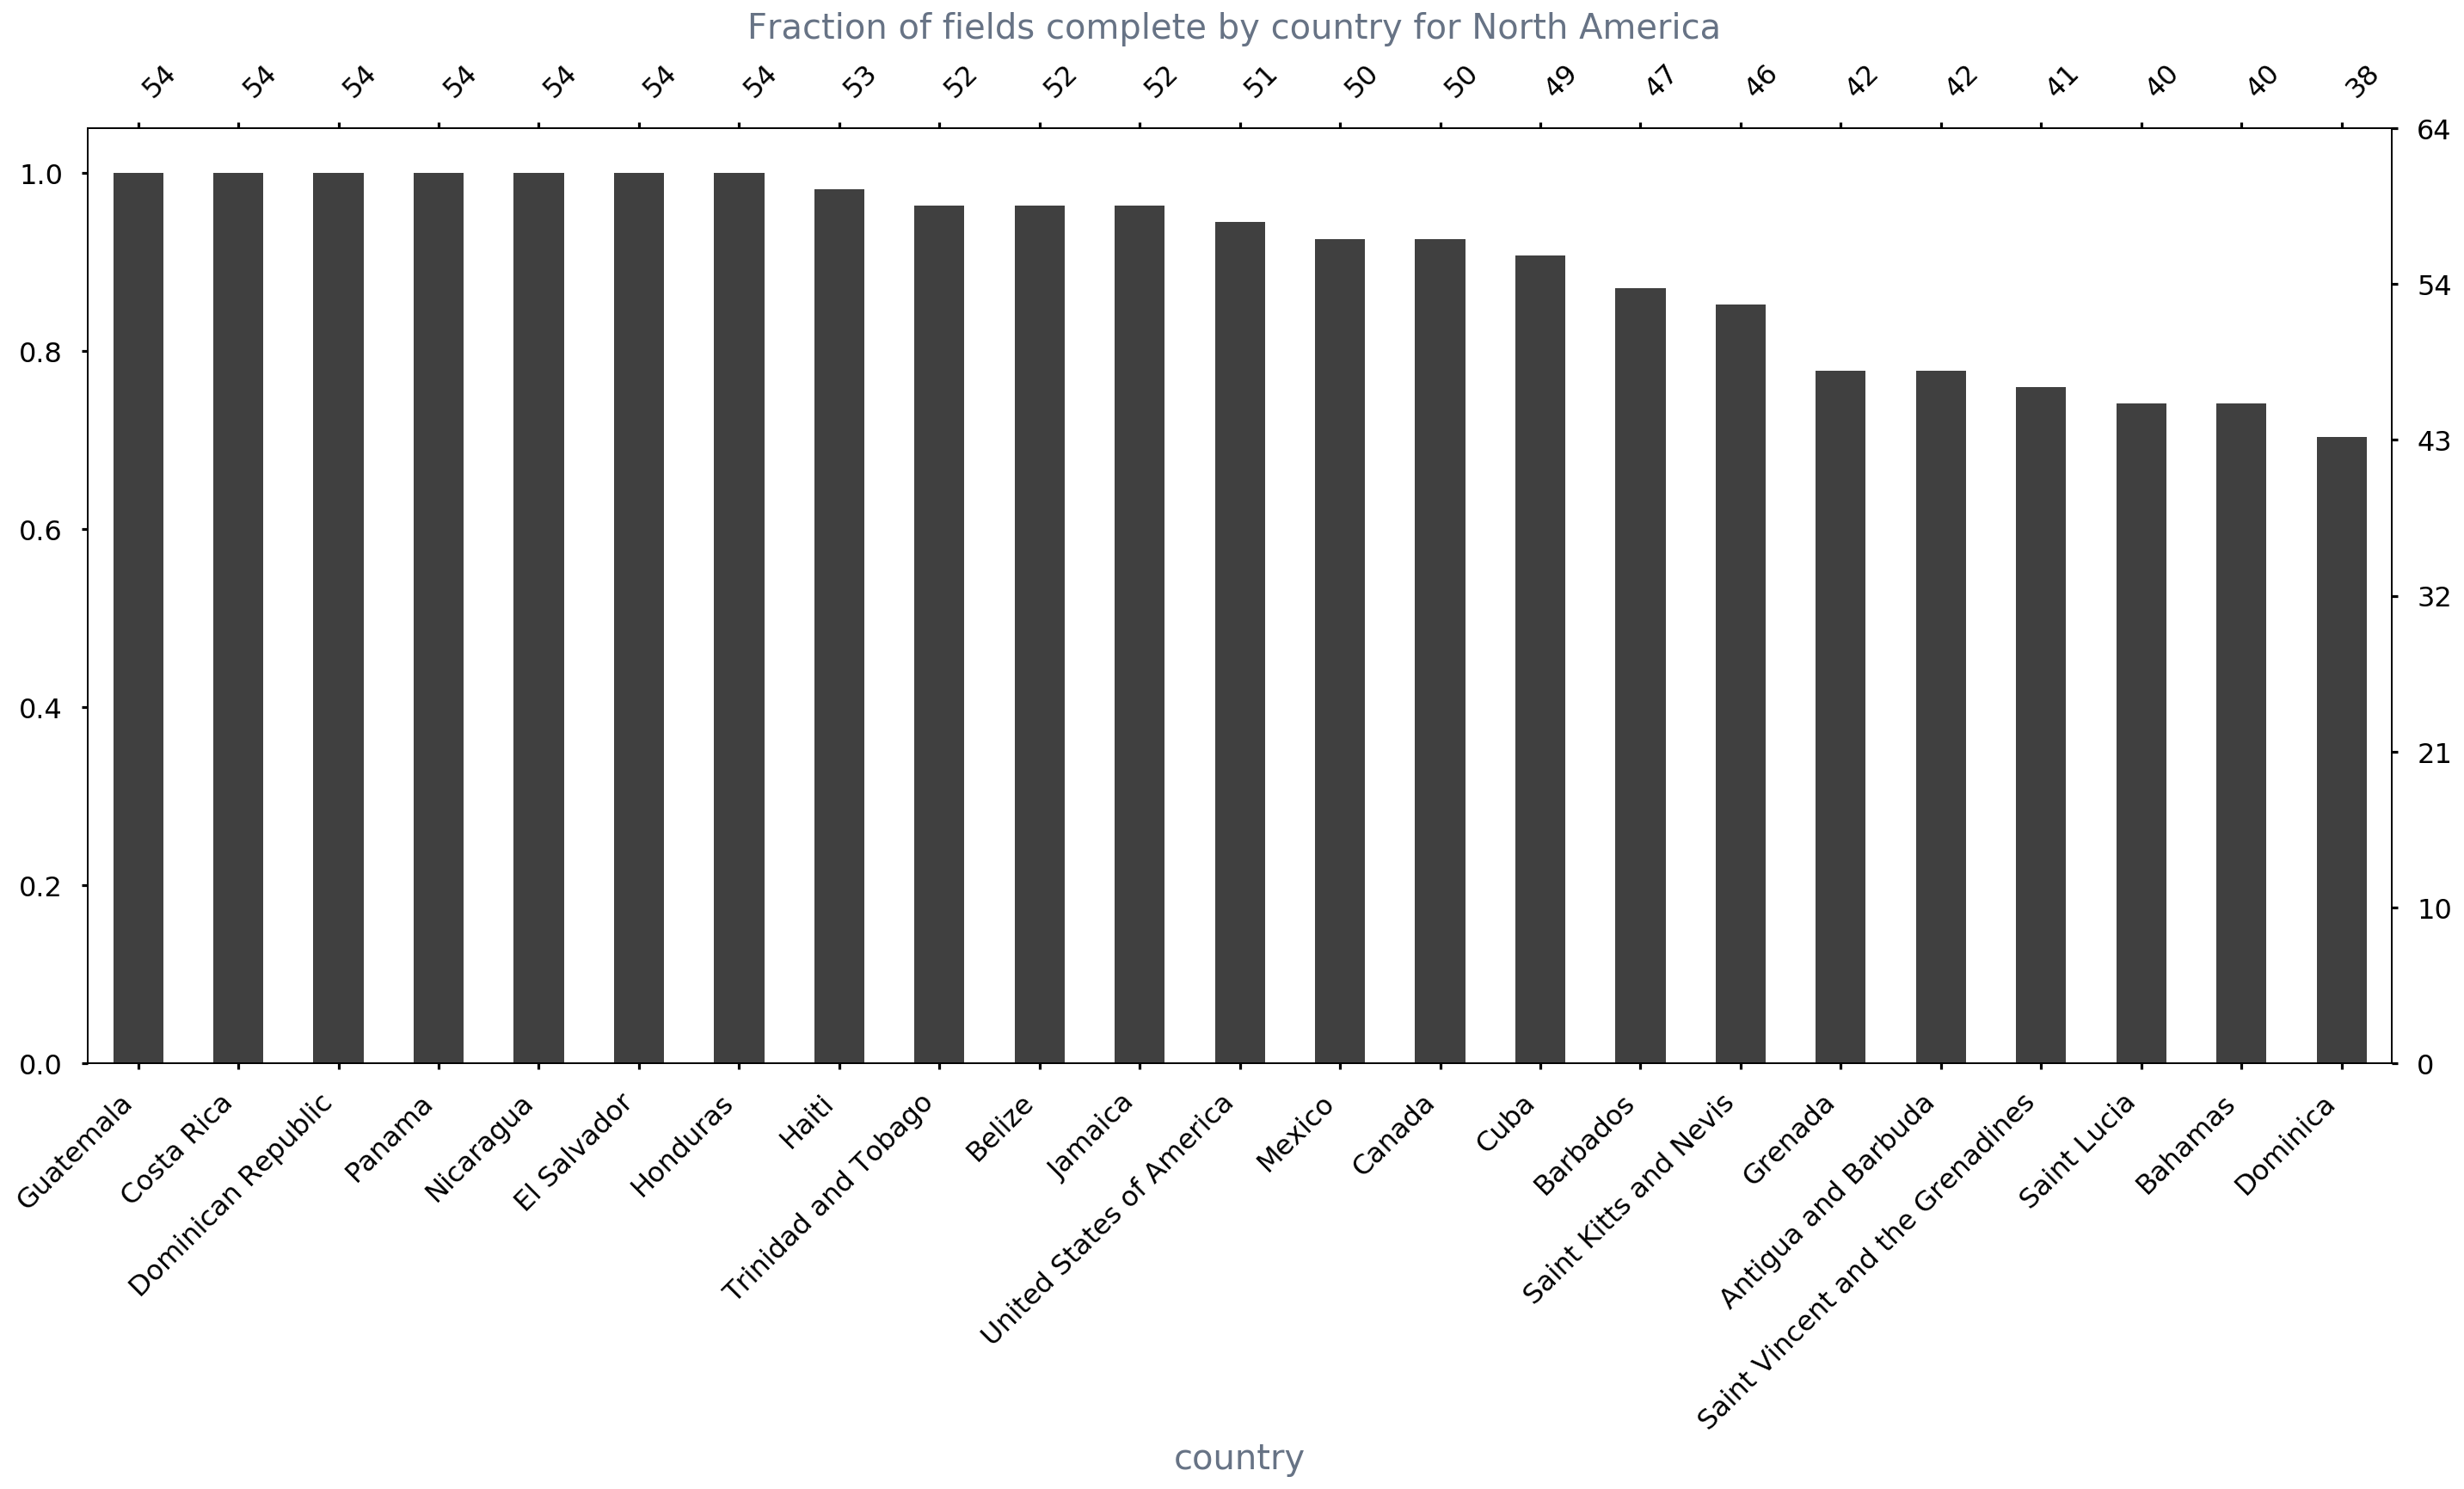

In [13]:
msno.bar(msno.nullity_sort(time_slice(north_america, '2013-2017'), sort='descending').T, inline=False)
plt.title('Fraction of fields complete by country for North America \n \n');

**Question:** Is there any pattern in the countries with most missing data? 

**Question:** What are potential reasons for missing data? What can we check? 

In [14]:
folium.Map(location=[18.1160128,-77.8364762], tiles="CartoDB positron", 
           zoom_start=5, width=1200, height=600)

Spot check what data is missing for the Bahamas to get more granular understanding. 

In [15]:
msno.nullity_filter(country_slice(data, 'Bahamas').T, filter='bottom', p=0.1)

Bahamas      dam_capacity_per_capita  flood_occurence  gender_inequal_index  \
time_period                                                                   
1958-1962                        NaN              NaN                   NaN   
1963-1967                        NaN              NaN                   NaN   
1968-1972                        NaN              NaN                   NaN   
1973-1977                        NaN              NaN                   NaN   
1978-1982                        NaN              NaN                   NaN   
1983-1987                        NaN              NaN                   NaN   
1988-1992                        NaN              NaN                   NaN   
1993-1997                        NaN              NaN                   NaN   
1998-2002                        NaN              NaN                   NaN   
2003-2007                        NaN              NaN                   NaN   
2008-2012                        NaN              NaN                   NaN   
2013-2017                        NaN              NaN                0.2979   

Bahamas      groundwater_produced  interannual_variability  \
time_period                                                  
1958-1962                     NaN                      NaN   
1963-1967                     NaN                      NaN   
1968-1972                     NaN                      NaN   
1973-1977                     NaN                      NaN   
1978-1982                     NaN                      NaN   
1983-1987                     NaN                      NaN   
1988-1992                     NaN                      NaN   
1993-1997                     NaN                      NaN   
1998-2002                     NaN                      NaN   
2003-2007                     NaN                      NaN   
2008-2012                     NaN                      NaN   
2013-2017                     NaN                      NaN   

Bahamas      irrigation_potential  number_undernourished  \
time_period                                                
1958-1962                     NaN                    NaN   
1963-1967                     NaN                    NaN   
1968-1972                     NaN                    NaN   
1973-1977                     NaN                    NaN   
1978-1982                     NaN                    NaN   
1983-1987                     NaN                    NaN   
1988-1992                     NaN                    NaN   
1993-1997                     NaN                    NaN   
1998-2002                     NaN                    NaN   
2003-2007                     NaN                    NaN   
2008-2012                     NaN                    NaN   
2013-2017                     NaN                    NaN   

Bahamas      overlap_surface_groundwater  percent_undernourished  \
time_period                                                        
1958-1962                            NaN                     NaN   
1963-1967                            NaN                     NaN   
1968-1972                            NaN                     NaN   
1973-1977                            NaN                     NaN   
1978-1982                            NaN                     NaN   
1983-1987                            NaN                     NaN   
1988-1992                            NaN                     NaN   
1993-1997                            NaN                     NaN   
1998-2002                            NaN                     NaN   
2003-2007                            NaN                     NaN   
2008-2012                            NaN                     NaN   
2013-2017                            NaN                     NaN   

Bahamas      seasonal_variability  surface_groundwater_overlap  \
time_period                                                      
1958-1962                     NaN                          NaN   
1963-1967                     Na

**To do**: Choose another region to assess for missing data.

### By country for a single variable

In [16]:
# JSON with coordinates for country boundaries 
geo = r'world.json'

null_data = recent['agg_to_gdp'].notnull()*1
map = folium.Map(location=[48, -102], zoom_start=2)
map.choropleth(geo_data=geo, 
               data=null_data,
               columns=['country', 'agg_to_gdp'],
               key_on='feature.properties.name', reset=True,
               fill_color='GnBu', fill_opacity=1, line_opacity=0.2,
               legend_name='Missing agricultural contribution to GDP data 2013-2017')
map

**Question:** What does the pale pale green mean? Compared to the green? (E.g. Greenland versus Canada)

Now let's functionalize so we can look at other variables geospatially.

In [17]:
def plot_null_map(df, time_period, variable, 
                  legend_name=None):
    geo = r'world.json'
    
    
    ts = time_slice(df, time_period).reset_index().copy()
    ts[variable]=ts[variable].notnull()*1
    map = folium.Map(location=[48, -102], zoom_start=2)
    map.choropleth(geo_data=geo, 
                   data=ts,
                   columns=['country', variable],
                   key_on='feature.properties.name', reset=True,
                   fill_color='GnBu', fill_opacity=1, line_opacity=0.2,
                   legend_name=legend_name if legend_name else variable)
    return map

In [18]:
plot_null_map(data, '2013-2017', 'number_undernourished', 'Number undernourished is missing')

**Question:** Are there any patterns in missing data? Any questions that come to mind for further investigation? 

**To do:** Look at other variables 

### Over time

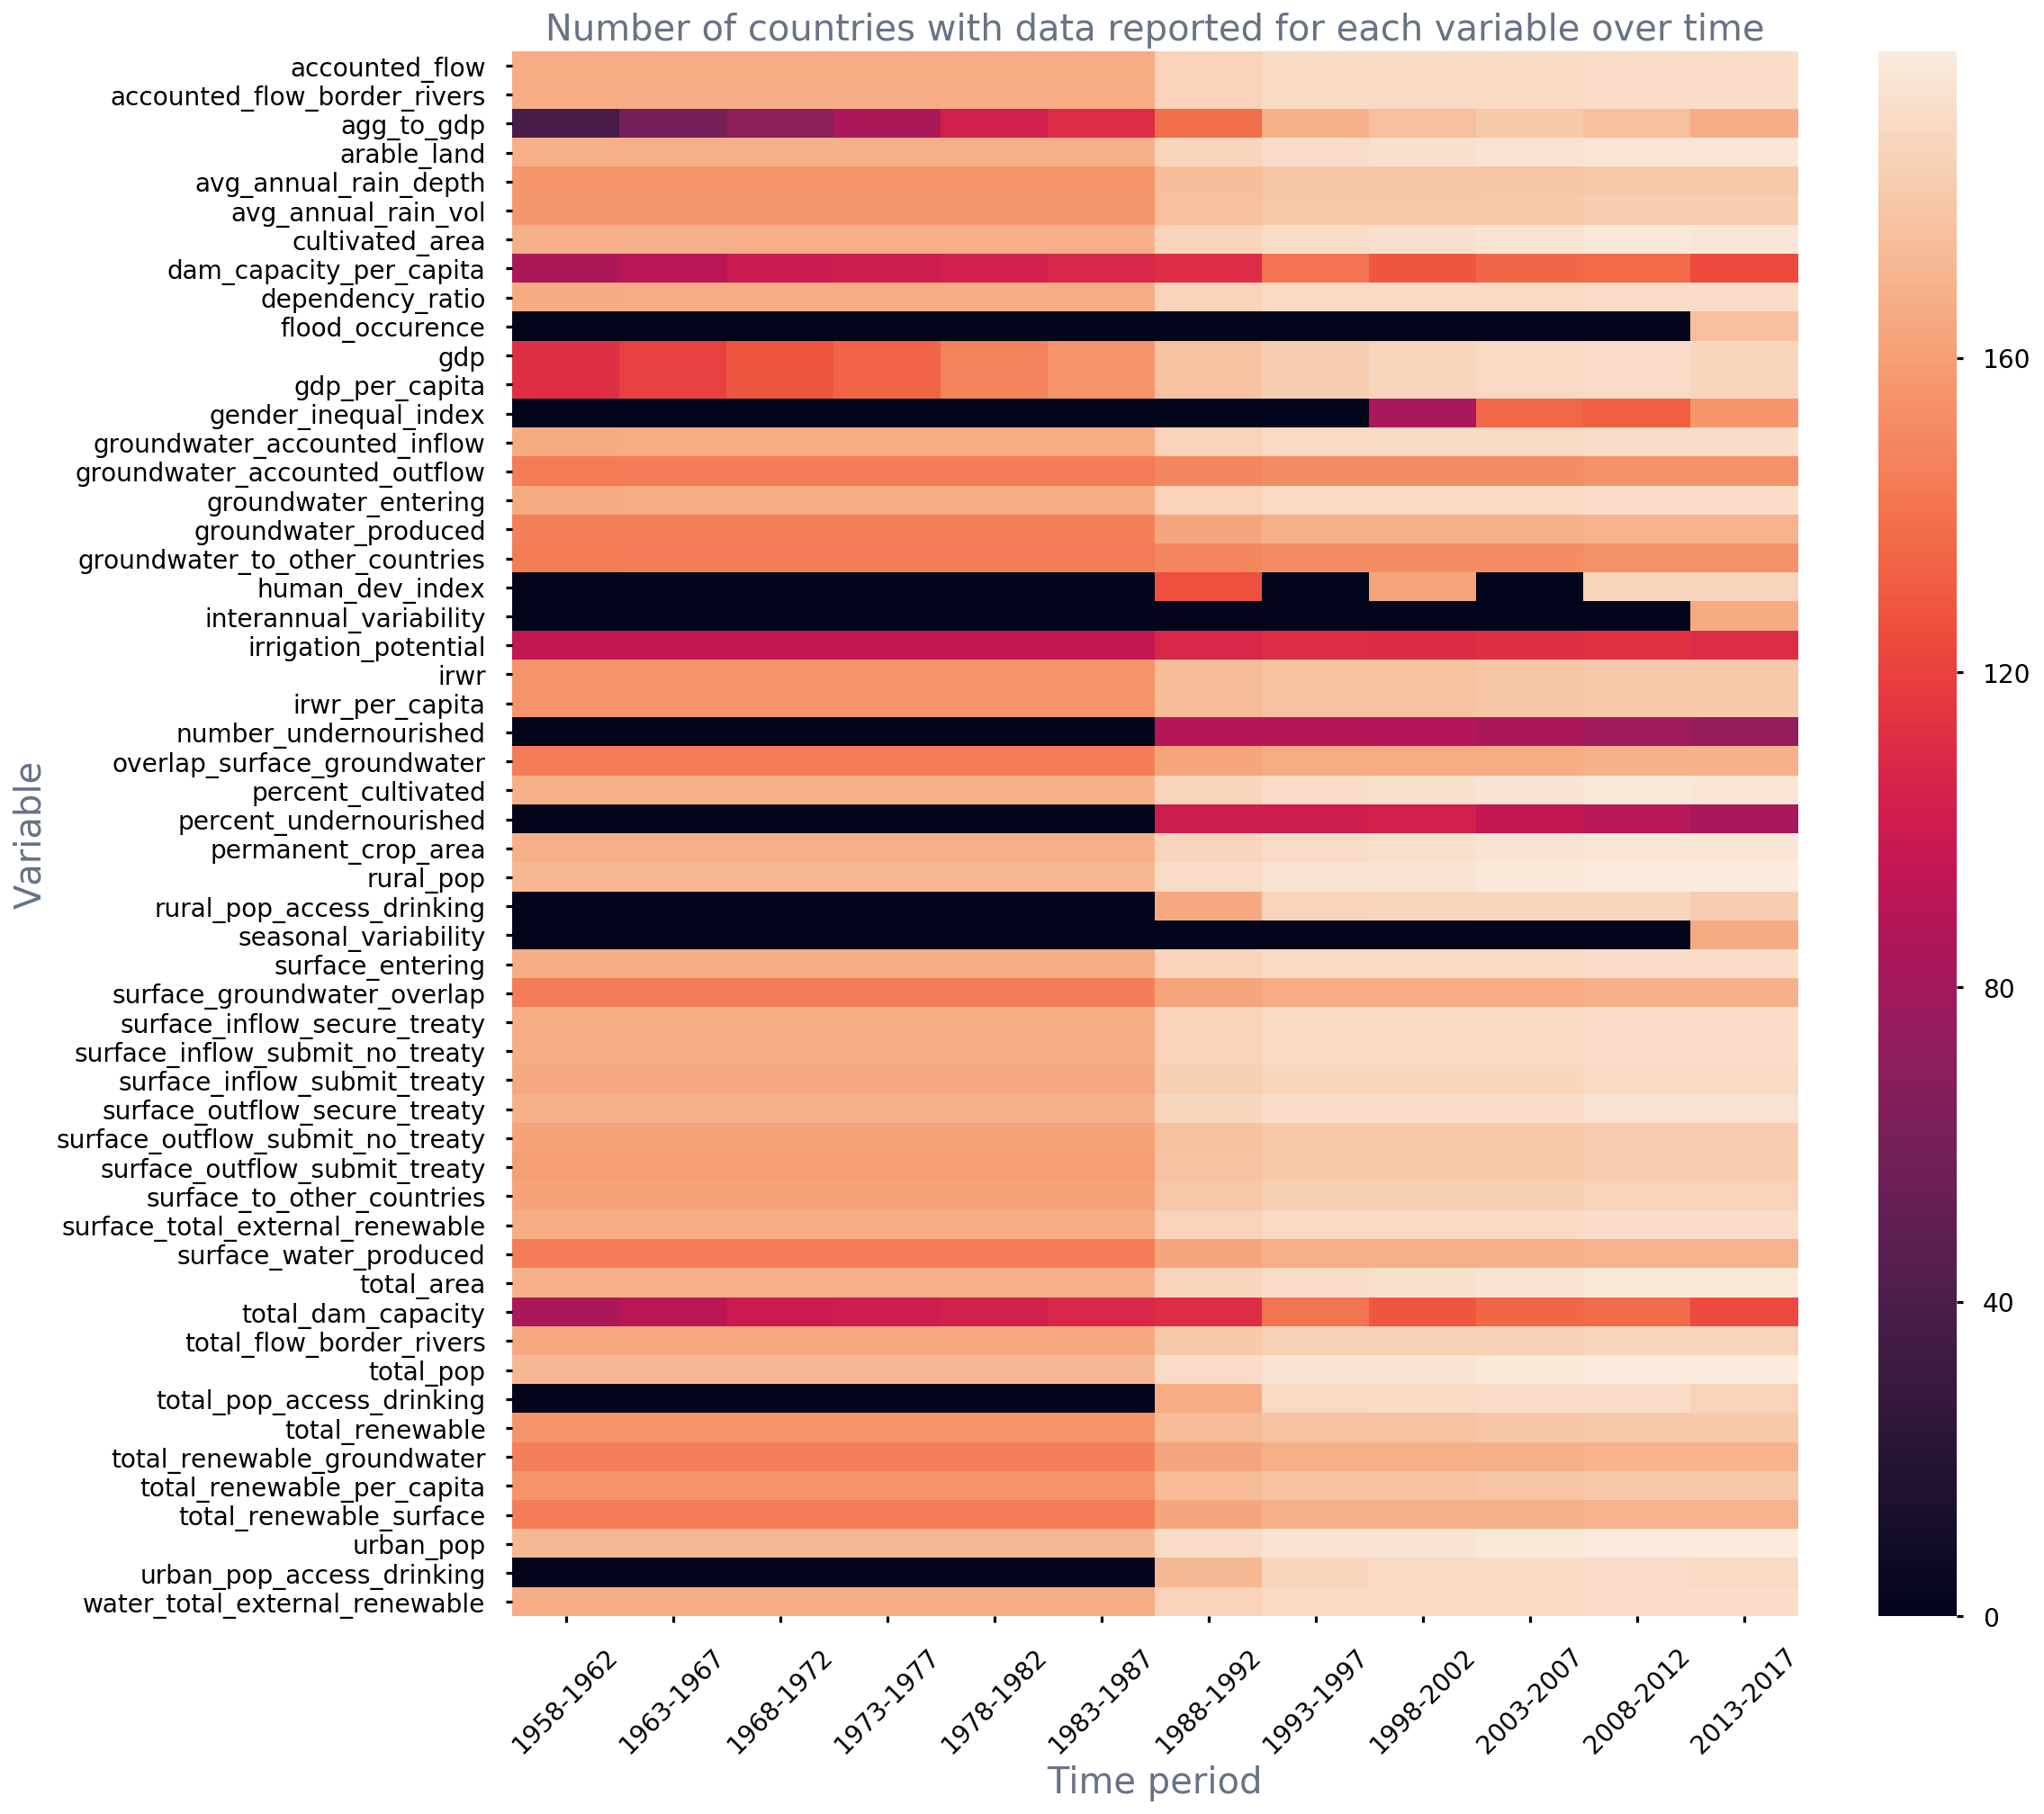

In [19]:
fig, ax = plt.subplots(figsize=(16, 16));
sns.heatmap(data.groupby(['time_period','variable']).value.count().unstack().T , ax=ax);
plt.xticks(rotation=45);
plt.xlabel('Time period');
plt.ylabel('Variable');
plt.title('Number of countries with data reported for each variable over time');

## Profiling 

Before trying to understand what information is in the data, make sure you understand what the data represents. 

Sanity check! Do the values make sense? 

**Things to do:**
* Categorical: count, count distinct, assess unique values 
* Numerical: count, min, max
* Spot-check random samples
* Slice and dice 

**Questions to consider:**
* Are there frequent values that are default values? 
* Are there fields that represent the same information? 
* What timestamp should you use? 
* Are there numerical values reported as strings? 
* Are there special values? 
* Are there variables that are numerical but really should be categorical? 
* Is data consistent across different operating systems, device type, platforms, countries? 
* Are there any direct relationships between fields (e.g. a value of x always implies a specific value of y)? 
* What are the units of measurement? Are they consistent? 
* Is data consistent across the population and time? 
* Are there obvious changes in reported data around the time of important events that affect data generation (e.g. version release)?

This stage really morphs into the univariate exploration that comes next as you are often diving into each variable one by one and first understanding it, exploring it, then checking that understanding again. We can however do some initial profiling with a few handy python packages.

### `pandas_profiling`

In [20]:
pandas_profiling.ProfileReport(time_slice(data, '2013-2017'))

### To do: Write down observations from profiling 

# **To do**: Collect list of questions you have coming out of quality assessment and profiling 

* Quality concerns to ask the data source
* Questions and hypotheses you want to explore further during exploration 
* Things you need to understand better and would ask a domain expert